In [736]:
#assignment 8

In [837]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import statistics
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [838]:
df = pd.read_csv('cars_messy.csv')

In [839]:
#2.0 Save your data into a file after it is cleaned in Assignment 8

In [840]:
df.columns = df.columns.str.strip()

In [841]:
df = df.drop(['DoorNum'], axis=1)

In [842]:
count_nan = df.isnull().sum()
print(count_nan[count_nan>0])

MPG             4
Cylinders       2
Displacement    7
Horsepower      4
Weight          5
Acceleration    6
Model           2
Origin          1
dtype: int64


In [843]:
df = df.fillna(df.median())

In [844]:
count_nan = df.isnull().sum()
print(count_nan[count_nan>0])

Origin    1
dtype: int64


In [845]:
df = df.dropna()

In [846]:
count_nan = df.isnull().sum()
print(count_nan[count_nan>0])

Series([], dtype: int64)


In [847]:
df = df[np.abs(stats.zscore(df[['Acceleration', 'Horsepower']])) <= 3]

In [848]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US
2,Plymouth Satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,US


In [849]:
df.to_csv('cars_cleaned.csv', index=False)

In [850]:
df = pd.read_csv('cars_cleaned.csv')

In [851]:
#2.1 Regression

In [852]:
#2.1.1 Based on Assignment 8 Correlation Matrix, find four features whichhave high Pearson's correlation coefficients with Weight. Then, plot the multiplescatter charts to show relationships between Weight and these features in onefigure. Briefly explain your observation in the plot.

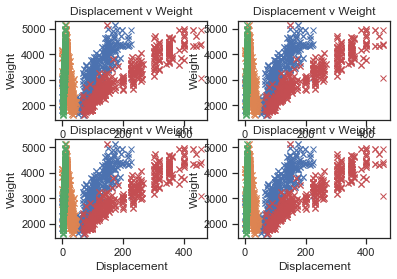

In [853]:
x_vals = df['Horsepower']
x_vals2 = df['MPG']
x_vals3 = df['Cylinders']
x_vals4 = df['Displacement']
y_vals = df['Weight']
fig, axes = plt.subplots(nrows=2, ncols=2);

for rows in axes:
    for ax1 in rows:
        ax1.plot(x_vals, y_vals, 'x')
        ax1.set_xlabel('Horsepower')
        ax1.set_ylabel('Weight')
        ax1.set_title('Horsepower v Weight');
        
for rows in axes:
    for ax2 in rows:
        ax2.plot(x_vals2, y_vals, 'x')
        ax2.set_xlabel('MPG')
        ax2.set_ylabel('Weight')
        ax2.set_title('MPG v Weight');
        
for rows in axes:
    for ax3 in rows:
        ax3.plot(x_vals3, y_vals, 'x')
        ax3.set_xlabel('Cylinders')
        ax3.set_ylabel('Weight')
        ax3.set_title('Cylinders v Weight');
        
for rows in axes:
    for ax4 in rows:
        ax4.plot(x_vals4, y_vals, 'x')
        ax4.set_xlabel('Displacement')
        ax4.set_ylabel('Weight')
        ax4.set_title('Displacement v Weight');

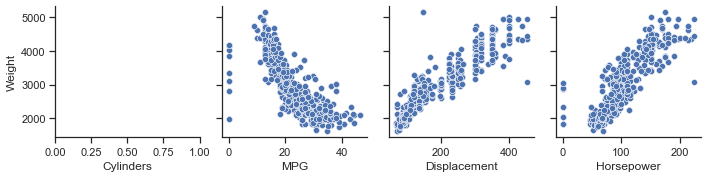

In [854]:
sns.set_theme(style="ticks")
sns.pairplot(df, 
            x_vars=['Cylinders', 'MPG', 'Displacement', 'Horsepower'],
            y_vars=['Weight']);

Comparing Several Features


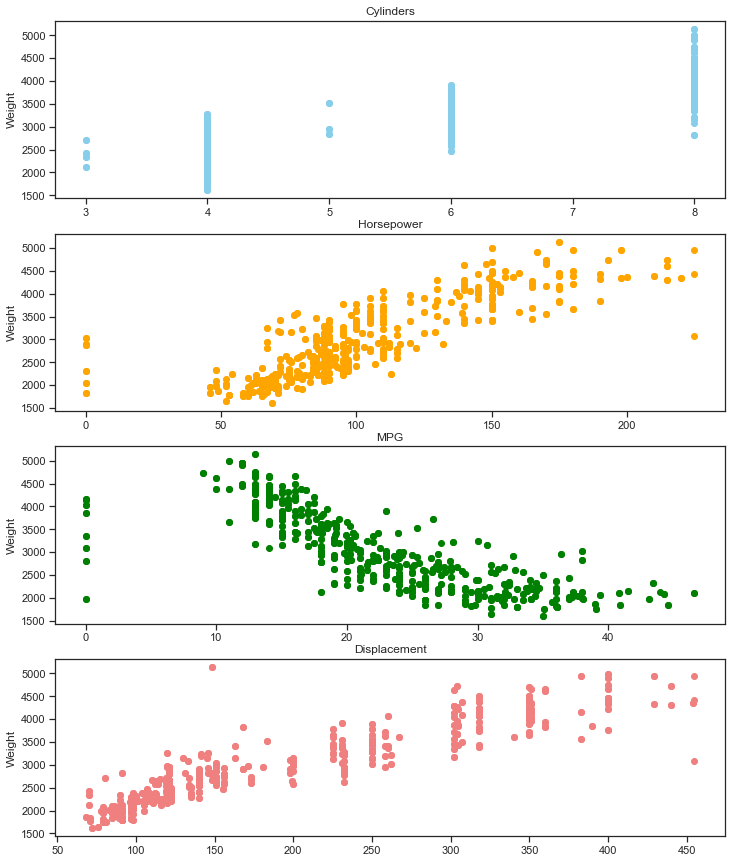

In [855]:
print('Comparing Several Features')

fig, ax = plt.subplots(4, figsize=(12, 15))

ax[0].scatter(x = df['Cylinders'], y = df['Weight'], color='skyblue')
ax[0].set_title("Cylinders")
ax[0].set_ylabel("Weight")

ax[1].scatter(x = df['Horsepower'], y = df['Weight'], color='orange')
ax[1].set_title("Horsepower")
ax[1].set_ylabel("Weight")

ax[2].scatter(x = df['MPG'], y = df['Weight'], color='green')
ax[2].set_title("MPG")
ax[2].set_ylabel("Weight")

ax[3].scatter(x = df['Displacement'], y = df['Weight'], color='lightcoral')
ax[3].set_title("Displacement")
ax[3].set_ylabel("Weight")

plt.show()

In [856]:
#2.1.2 Use Simple Linear Regression (LR) to Build a Model to Predict Weight

In [857]:
#2.1.2.1 Observe the above plots and select ONLY ONE feature to builda simple LR model to predict Weight and briefly explain why you selectthis feature

In [858]:
X7 = df[['Displacement']].values
y7 = df['Weight']

model = LinearRegression(fit_intercept=False)
clf = model.fit(X7, y7)
print ('Coefficient: ', clf.coef_)

predictions = model.predict(X7)
for index in range(len(predictions)):
    print('Actual: ', y7[index], 'Predicted:  ', predictions[index], 'Weight:  ', X7[index, 0])

Coefficient:  [13.7274171]
Actual:  3504.0 Predicted:   4214.317050795318 Weight:   307.0
Actual:  3504.0 Predicted:   4214.317050795318 Weight:   307.0
Actual:  3693.0 Predicted:   4804.595986248734 Weight:   350.0
Actual:  3693.0 Predicted:   4804.595986248734 Weight:   350.0
Actual:  3436.0 Predicted:   4365.318638934564 Weight:   318.0
Actual:  3436.0 Predicted:   4365.318638934564 Weight:   318.0
Actual:  3433.0 Predicted:   4173.134799484615 Weight:   304.0
Actual:  3433.0 Predicted:   4173.134799484615 Weight:   304.0
Actual:  3449.0 Predicted:   4145.679965277479 Weight:   302.0
Actual:  3449.0 Predicted:   4145.679965277479 Weight:   302.0
Actual:  4341.0 Predicted:   5889.061937430591 Weight:   429.0
Actual:  4341.0 Predicted:   5889.061937430591 Weight:   429.0
Actual:  4354.0 Predicted:   6232.247365019786 Weight:   454.0
Actual:  4354.0 Predicted:   6232.247365019786 Weight:   454.0
Actual:  4312.0 Predicted:   6040.063525569837 Weight:   440.0
Actual:  4312.0 Predicted:  

Actual:  2660.0 Predicted:   1661.017469531705 Weight:   121.0
Actual:  2807.0 Predicted:   2141.4770681565788 Weight:   156.0
Actual:  2807.0 Predicted:   2141.4770681565788 Weight:   156.0
Actual:  3664.0 Predicted:   4804.595986248734 Weight:   350.0
Actual:  3664.0 Predicted:   4804.595986248734 Weight:   350.0
Actual:  3102.0 Predicted:   2718.0285865064266 Weight:   198.0
Actual:  3102.0 Predicted:   2718.0285865064266 Weight:   198.0
Actual:  2875.0 Predicted:   2745.4834207135623 Weight:   200.0
Actual:  2875.0 Predicted:   2745.4834207135623 Weight:   200.0
Actual:  2901.0 Predicted:   3184.7607680277324 Weight:   232.0
Actual:  2901.0 Predicted:   3184.7607680277324 Weight:   232.0
Actual:  3336.0 Predicted:   3431.854275891953 Weight:   250.0
Actual:  3336.0 Predicted:   3431.854275891953 Weight:   250.0
Actual:  1950.0 Predicted:   1084.465951181857 Weight:   79.0
Actual:  1950.0 Predicted:   1084.465951181857 Weight:   79.0
Actual:  2451.0 Predicted:   1674.744886635273 We

Actual:  1985.0 Predicted:   1070.7385340782894 Weight:   78.0
Actual:  2070.0 Predicted:   1166.830453803264 Weight:   85.0
Actual:  2070.0 Predicted:   1166.830453803264 Weight:   85.0
Actual:  1800.0 Predicted:   1249.1949564246709 Weight:   91.0
Actual:  1800.0 Predicted:   1249.1949564246709 Weight:   91.0
Actual:  3365.0 Predicted:   3569.128446927631 Weight:   260.0
Actual:  3365.0 Predicted:   3569.128446927631 Weight:   260.0
Actual:  3735.0 Predicted:   4365.318638934564 Weight:   318.0
Actual:  3735.0 Predicted:   4365.318638934564 Weight:   318.0
Actual:  3570.0 Predicted:   4145.679965277479 Weight:   302.0
Actual:  3570.0 Predicted:   4145.679965277479 Weight:   302.0
Actual:  3535.0 Predicted:   3171.0333509241646 Weight:   231.0
Actual:  3535.0 Predicted:   3171.0333509241646 Weight:   231.0
Actual:  3155.0 Predicted:   2745.4834207135623 Weight:   200.0
Actual:  3155.0 Predicted:   2745.4834207135623 Weight:   200.0
Actual:  2965.0 Predicted:   2745.4834207135623 Weigh

Actual:  2865.0 Predicted:   1921.8383944994935 Weight:   140.0
Actual:  2865.0 Predicted:   1921.8383944994935 Weight:   140.0
Actual:  3035.0 Predicted:   2072.8399826387395 Weight:   151.0
Actual:  3035.0 Predicted:   2072.8399826387395 Weight:   151.0
Actual:  1980.0 Predicted:   1441.3787958746202 Weight:   105.0
Actual:  1980.0 Predicted:   1441.3787958746202 Weight:   105.0
Actual:  2025.0 Predicted:   1249.1949564246709 Weight:   91.0
Actual:  2025.0 Predicted:   1249.1949564246709 Weight:   91.0
Actual:  1970.0 Predicted:   1249.1949564246709 Weight:   91.0
Actual:  1970.0 Predicted:   1249.1949564246709 Weight:   91.0
Actual:  2125.0 Predicted:   1441.3787958746202 Weight:   105.0
Actual:  2125.0 Predicted:   1441.3787958746202 Weight:   105.0
Actual:  2125.0 Predicted:   1345.2868761496454 Weight:   98.0
Actual:  2125.0 Predicted:   1345.2868761496454 Weight:   98.0
Actual:  2160.0 Predicted:   1647.2900524281374 Weight:   120.0
Actual:  2160.0 Predicted:   1647.290052428137

In [859]:
#Order of Columns: Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin

X = df.iloc[:,3].values.reshape(-1,1)
y = df.iloc[:,5].values.reshape(-1,1)

model = LinearRegression(fit_intercept=False)
clf = model.fit(X, y)
print ('Coefficient: ', clf.coef_)

predictions = model.predict(X)
for index in range(len(predictions)):
    print('Actual: ', y[index], 'Predicted:  ', predictions[index], 'Weight:  ', X[index, 0])

Coefficient:  [[13.7274171]]
Actual:  [3504.] Predicted:   [4214.3170508] Weight:   307.0
Actual:  [3504.] Predicted:   [4214.3170508] Weight:   307.0
Actual:  [3693.] Predicted:   [4804.59598625] Weight:   350.0
Actual:  [3693.] Predicted:   [4804.59598625] Weight:   350.0
Actual:  [3436.] Predicted:   [4365.31863893] Weight:   318.0
Actual:  [3436.] Predicted:   [4365.31863893] Weight:   318.0
Actual:  [3433.] Predicted:   [4173.13479948] Weight:   304.0
Actual:  [3433.] Predicted:   [4173.13479948] Weight:   304.0
Actual:  [3449.] Predicted:   [4145.67996528] Weight:   302.0
Actual:  [3449.] Predicted:   [4145.67996528] Weight:   302.0
Actual:  [4341.] Predicted:   [5889.06193743] Weight:   429.0
Actual:  [4341.] Predicted:   [5889.06193743] Weight:   429.0
Actual:  [4354.] Predicted:   [6232.24736502] Weight:   454.0
Actual:  [4354.] Predicted:   [6232.24736502] Weight:   454.0
Actual:  [4312.] Predicted:   [6040.06352557] Weight:   440.0
Actual:  [4312.] Predicted:   [6040.0635255

Actual:  [2822.5] Predicted:   [2038.52143988] Weight:   148.5
Actual:  [4502.] Predicted:   [4804.59598625] Weight:   350.0
Actual:  [4502.] Predicted:   [4804.59598625] Weight:   350.0
Actual:  [4456.] Predicted:   [4804.59598625] Weight:   350.0
Actual:  [4456.] Predicted:   [4804.59598625] Weight:   350.0
Actual:  [4422.] Predicted:   [5490.96684143] Weight:   400.0
Actual:  [4422.] Predicted:   [5490.96684143] Weight:   400.0
Actual:  [2330.] Predicted:   [960.91919725] Weight:   70.0
Actual:  [2330.] Predicted:   [960.91919725] Weight:   70.0
Actual:  [3892.] Predicted:   [4173.13479948] Weight:   304.0
Actual:  [3892.] Predicted:   [4173.13479948] Weight:   304.0
Actual:  [4098.] Predicted:   [4214.3170508] Weight:   307.0
Actual:  [4098.] Predicted:   [4214.3170508] Weight:   307.0
Actual:  [4294.] Predicted:   [4145.67996528] Weight:   302.0
Actual:  [4294.] Predicted:   [4145.67996528] Weight:   302.0
Actual:  [4077.] Predicted:   [4365.31863893] Weight:   318.0
Actual:  [407

Actual:  [2694.] Predicted:   [1578.65296691] Weight:   115.0
Actual:  [2957.] Predicted:   [1647.29005243] Weight:   120.0
Actual:  [2957.] Predicted:   [1647.29005243] Weight:   120.0
Actual:  [2945.] Predicted:   [1661.01746953] Weight:   121.0
Actual:  [2945.] Predicted:   [1661.01746953] Weight:   121.0
Actual:  [1795.] Predicted:   [1249.19495642] Weight:   91.0
Actual:  [1795.] Predicted:   [1249.19495642] Weight:   91.0
Actual:  [2464.] Predicted:   [1468.83363008] Weight:   107.0
Actual:  [2464.] Predicted:   [1468.83363008] Weight:   107.0
Actual:  [2220.] Predicted:   [1592.38038401] Weight:   116.0
Actual:  [2220.] Predicted:   [1592.38038401] Weight:   116.0
Actual:  [2572.] Predicted:   [1921.8383945] Weight:   140.0
Actual:  [2572.] Predicted:   [1921.8383945] Weight:   140.0
Actual:  [2255.] Predicted:   [1345.28687615] Weight:   98.0
Actual:  [2255.] Predicted:   [1345.28687615] Weight:   98.0
Actual:  [2202.] Predicted:   [1386.46912746] Weight:   101.0
Actual:  [2202

Actual:  [2130.] Predicted:   [1249.19495642] Weight:   91.0
Actual:  [2130.] Predicted:   [1249.19495642] Weight:   91.0
Actual:  [2670.] Predicted:   [2072.83998264] Weight:   151.0
Actual:  [2670.] Predicted:   [2072.83998264] Weight:   151.0
Actual:  [2595.] Predicted:   [2374.84315892] Weight:   173.0
Actual:  [2595.] Predicted:   [2374.84315892] Weight:   173.0
Actual:  [2700.] Predicted:   [2374.84315892] Weight:   173.0
Actual:  [2700.] Predicted:   [2374.84315892] Weight:   173.0
Actual:  [2556.] Predicted:   [2072.83998264] Weight:   151.0
Actual:  [2556.] Predicted:   [2072.83998264] Weight:   151.0
Actual:  [2144.] Predicted:   [1345.28687615] Weight:   98.0
Actual:  [2144.] Predicted:   [1345.28687615] Weight:   98.0
Actual:  [1968.] Predicted:   [1221.74012222] Weight:   89.0
Actual:  [1968.] Predicted:   [1221.74012222] Weight:   89.0
Actual:  [2120.] Predicted:   [1345.28687615] Weight:   98.0
Actual:  [2120.] Predicted:   [1345.28687615] Weight:   98.0
Actual:  [2019.]

In [860]:
#2.1.2.2 Split the dataset into a training set(80%) and a test set(20%)

In [861]:
len(df)

803

In [862]:
len(df) * .8


642.4000000000001

In [863]:
len(df) * 0.2

160.60000000000002

In [864]:
df_train = df[:642]

In [865]:
df_test = df[642:]

In [866]:
len(df_test)

161

In [867]:
len(df_train)

642

In [868]:
#Explain


In [869]:
#2.1.2.3Build a LR model to find details (i.e., intercept and slope) of the relationship between Weight and this feature.

In [870]:
#Order of Columns: Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin

X8 = df_train[['MPG','Cylinders','Displacement','Horsepower','Acceleration','Model']].values
y8 = df_train['Weight']

model8 = LinearRegression()
clf8 = model8.fit(X8, y8)
print ('Coefficient: ', clf.coef_)
print('Y intercept: ', clf.intercept_)

predictions8 = model8.predict(X8)
for index in range(len(predictions8)):
    print('Actual: ', y8[index], 'Predicted:  ', predictions8[index], 'Weight:  ', X8[index, 0])

Coefficient:  [[13.7274171]]
Y intercept:  0.0
Actual:  3504.0 Predicted:   3510.6480032857494 Weight:   18.0
Actual:  3504.0 Predicted:   3510.6480032857494 Weight:   18.0
Actual:  3693.0 Predicted:   3976.482649689033 Weight:   15.0
Actual:  3693.0 Predicted:   3976.482649689033 Weight:   15.0
Actual:  3436.0 Predicted:   3650.0088617259203 Weight:   18.0
Actual:  3436.0 Predicted:   3650.0088617259203 Weight:   18.0
Actual:  3433.0 Predicted:   3716.304487081003 Weight:   16.0
Actual:  3433.0 Predicted:   3716.304487081003 Weight:   16.0
Actual:  3449.0 Predicted:   3523.650664058135 Weight:   17.0
Actual:  3449.0 Predicted:   3523.650664058135 Weight:   17.0
Actual:  4341.0 Predicted:   4398.886620450296 Weight:   15.0
Actual:  4341.0 Predicted:   4398.886620450296 Weight:   15.0
Actual:  4354.0 Predicted:   4624.558328582503 Weight:   14.0
Actual:  4354.0 Predicted:   4624.558328582503 Weight:   14.0
Actual:  4312.0 Predicted:   4515.995043011273 Weight:   14.0
Actual:  4312.0 Pre

Actual:  1649.0 Predicted:   1842.0722682159185 Weight:   31.0
Actual:  2003.0 Predicted:   2038.8110841948906 Weight:   32.0
Actual:  2003.0 Predicted:   2038.8110841948906 Weight:   32.0
Actual:  2125.0 Predicted:   2045.4630168245062 Weight:   28.0
Actual:  2125.0 Predicted:   2045.4630168245062 Weight:   28.0
Actual:  2108.0 Predicted:   2210.161266653621 Weight:   24.0
Actual:  2108.0 Predicted:   2210.161266653621 Weight:   24.0
Actual:  2246.0 Predicted:   2153.853818668841 Weight:   26.0
Actual:  2246.0 Predicted:   2153.853818668841 Weight:   26.0
Actual:  2489.0 Predicted:   2449.4273514485753 Weight:   24.0
Actual:  2489.0 Predicted:   2449.4273514485753 Weight:   24.0
Actual:  2391.0 Predicted:   2351.7319853426084 Weight:   26.0
Actual:  2391.0 Predicted:   2351.7319853426084 Weight:   26.0
Actual:  2000.0 Predicted:   1943.8733191818346 Weight:   31.0
Actual:  2000.0 Predicted:   1943.8733191818346 Weight:   31.0
Actual:  3264.0 Predicted:   3162.5689987611527 Weight:   1

Actual:  2515.0 Predicted:   2688.6829618309116 Weight:   21.1
Actual:  2745.0 Predicted:   2876.397689175052 Weight:   23.2
Actual:  2745.0 Predicted:   2876.397689175052 Weight:   23.2
Actual:  2855.0 Predicted:   2733.168435404504 Weight:   23.8
Actual:  2855.0 Predicted:   2733.168435404504 Weight:   23.8
Actual:  2405.0 Predicted:   2586.031189548227 Weight:   23.9
Actual:  2405.0 Predicted:   2586.031189548227 Weight:   23.9
Actual:  2830.0 Predicted:   2914.7711342099187 Weight:   20.3
Actual:  2830.0 Predicted:   2914.7711342099187 Weight:   20.3
Actual:  3140.0 Predicted:   3248.554985686986 Weight:   17.0
Actual:  3140.0 Predicted:   3248.554985686986 Weight:   17.0
Actual:  2795.0 Predicted:   2841.6078836195343 Weight:   21.6
Actual:  2795.0 Predicted:   2841.6078836195343 Weight:   21.6
Actual:  3410.0 Predicted:   3450.633297883403 Weight:   16.2
Actual:  3410.0 Predicted:   3450.633297883403 Weight:   16.2
Actual:  1990.0 Predicted:   2076.007126633361 Weight:   31.5
Act

In [871]:
#2.1.2.4  Use the test set to make prediction and print out Root Mean Squared Error (RMSE). 

In [872]:
#Order of Columns: Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin

Xtest = df_test[['MPG','Cylinders','Displacement','Horsepower','Acceleration','Model']].values
ytest = df_test['Weight'].values

Ypredictions = LinearRegression().predict(Xtest)
clf0 = Ypredictions.fit(Xtest, ytest)

print ('Coefficient: ', clf0.coef_)
print('Y intercept: ', clf0.intercept_);

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [919]:
np.sqrt(metrics.mean_squared_error(ytest, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [161, 803]

In [875]:
#Order of Columns: Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin

X_test1 = df_test.iloc[:, 1:7].values
y_test1 = df_test.iloc[:,5].values

modeltest1 = LinearRegression()
clftest1 = modeltest1.fit(X_test1, y_test1)
print ('Coefficient: ', clftest1.coef_)

ypredictions1 = modeltest1.predict(X_test1)
for index in range(len(ypredictions1)):
    print('Actual: ', y_test1[index], 'Predicted:  ', ypredictions1[index], 'Weight:  ', X_test1[index, 0])

Coefficient:  [ 4.86240063e-15 -7.86809630e-14  7.43387262e-16 -5.26270118e-16
  1.00000000e+00 -1.59917482e-15]
Actual:  2188.0 Predicted:   2188.0 Weight:   34.3
Actual:  2188.0 Predicted:   2188.0 Weight:   34.3
Actual:  2542.0 Predicted:   2542.0 Weight:   31.3
Actual:  2542.0 Predicted:   2542.0 Weight:   31.3
Actual:  2434.0 Predicted:   2434.0 Weight:   37.0
Actual:  2434.0 Predicted:   2434.0 Weight:   37.0
Actual:  2265.0 Predicted:   2265.0 Weight:   32.2
Actual:  2265.0 Predicted:   2265.0 Weight:   32.2
Actual:  2110.0 Predicted:   2110.0 Weight:   46.6
Actual:  2110.0 Predicted:   2110.0 Weight:   46.6
Actual:  2800.0 Predicted:   2800.0 Weight:   27.9
Actual:  2800.0 Predicted:   2800.0 Weight:   27.9
Actual:  2110.0 Predicted:   2110.0 Weight:   40.8
Actual:  2110.0 Predicted:   2110.0 Weight:   40.8
Actual:  2085.0 Predicted:   2085.0 Weight:   44.3
Actual:  2085.0 Predicted:   2085.0 Weight:   44.3
Actual:  2335.0 Predicted:   2335.0 Weight:   43.4
Actual:  2335.0 Pred

In [876]:
#2.1.2.5 Plot the predicted straight line with the test data and briefly explain your observation in the plot.

In [877]:
#answer

In [878]:
#2.2 Clustering

In [879]:

#2.2.1 Use K-means Clustering algorithm to find groups between Horsepower and Weight. Use number of clusters as 3. Plot clustered groups with scatter charts

In [880]:
from sklearn.cluster import KMeans

IndexError: index 4 is out of bounds for axis 1 with size 2

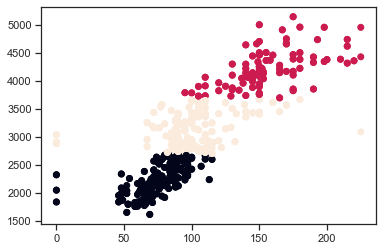

In [881]:
kmeans1 = KMeans(n_clusters=3).fit(df.iloc[:, 4:6])
centroids1 = kmeans1.cluster_centers_

plt.scatter(df['Horsepower'], df['Weight'], c=kmeans1.labels_.astype(float))
plt.scatter(centroids[:, 4], centroids[:, 5], c='lightblue')
plt.show()

In [882]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 4], X[:, 5], c=y_kmeans, s=300, cmap='viridis')


IndexError: index 4 is out of bounds for axis 1 with size 1

In [883]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 4], X[:, 5], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_



plt.scatter(centers[:, 4], centers[:, 5], c='black', s=200, alpha=0.5);



IndexError: index 4 is out of bounds for axis 1 with size 1

In [884]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = y_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


IndexError: index 1 is out of bounds for axis 1 with size 1

In [885]:
from pandas import DataFrame

df.Horsepower.values

array([130., 130., 165., 165., 150., 150., 150., 150., 140., 140., 198.,
       198., 220., 220., 215., 215., 225., 190., 190., 115., 115., 165.,
       165., 153., 153., 175., 175., 175., 175., 170., 170., 160., 160.,
       140., 140., 150., 150., 225.,  95.,  95.,  95.,  95.,  97.,  97.,
        85.,  85.,  88.,  88.,  46.,  46.,  87.,  87.,  90.,  90.,  95.,
        95., 113., 113.,  90.,  90., 215., 215., 200., 200., 210., 210.,
       193., 193.,  88.,  88.,  90.,  90.,  95.,  95.,   0.,   0.,  48.,
        48., 100., 100., 105., 105., 100., 100.,  88.,  88., 100., 100.,
       165., 165., 175., 175., 153., 153., 150., 150., 180., 180., 170.,
       170., 175., 175., 110., 110.,  72.,  72., 100., 100.,  88.,  88.,
        86.,  86.,  90.,  90.,  70.,  70.,  76.,  76.,  65.,  65.,  69.,
        69.,  60.,  60.,  70.,  70.,  95.,  95.,  80.,  80.,  54.,  54.,
        90.,  90.,  86.,  86., 165., 165., 175., 175., 150., 150., 153.,
       153., 150., 150.,  92.,  92., 155., 155., 16

In [886]:
df.Weight.values

array([3504. , 3504. , 3693. , 3693. , 3436. , 3436. , 3433. , 3433. ,
       3449. , 3449. , 4341. , 4341. , 4354. , 4354. , 4312. , 4312. ,
       4425. , 3850. , 3850. , 3090. , 3090. , 4142. , 4142. , 4034. ,
       4034. , 4166. , 4166. , 3850. , 3850. , 3563. , 3563. , 3609. ,
       3609. , 3353. , 3353. , 3761. , 3761. , 3086. , 2372. , 2372. ,
       2833. , 2833. , 2774. , 2774. , 2587. , 2587. , 2130. , 2130. ,
       1835. , 1835. , 2672. , 2672. , 2430. , 2430. , 2375. , 2375. ,
       2234. , 2234. , 2648. , 2648. , 4615. , 4615. , 4376. , 4376. ,
       4382. , 4382. , 4732. , 4732. , 2130. , 2130. , 2264. , 2264. ,
       2228. , 2228. , 2046. , 2046. , 1978. , 1978. , 2634. , 2634. ,
       3439. , 3439. , 3329. , 3329. , 3302. , 3302. , 3288. , 3288. ,
       4209. , 4209. , 4464. , 4464. , 4154. , 4154. , 4096. , 4096. ,
       4955. , 4955. , 4746. , 4746. , 5140. , 5140. , 2962. , 2962. ,
       2408. , 2408. , 3282. , 3282. , 3139. , 3139. , 2220. , 2220. ,
      

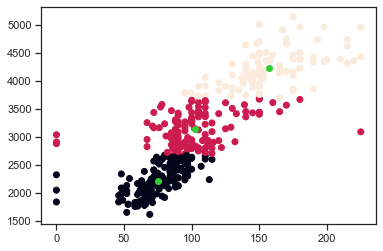

In [887]:
Data = {
    'x9':[130., 165., 150., 150., 140., 198., 220., 215., 225., 190., 115.,
       165., 153., 175., 175., 170., 160., 140., 150., 225.,  95.,  95.,
        97.,  85.,  88.,  46.,  87.,  90.,  95., 113.,  90., 215., 200.,
       210., 193.,  88.,  90.,  95.,   0.,  48., 100., 105., 100.,  88.,
       100., 165., 175., 153., 150., 180., 170., 175., 110.,  72., 100.,
        88.,  86.,  90.,  70.,  76.,  65.,  69.,  60.,  70.,  95.,  80.,
        54.,  90.,  86., 165., 175., 150., 153., 150.,  92., 155., 160.,
       190.,  97., 150., 130., 140., 150., 112.,  76.,  87.,  69.,  86.,
        97.,  80.,  88., 175., 150., 145., 137., 150., 198., 150., 158.,
       150., 215., 225., 175., 105., 100., 100.,  88.,  95.,  46., 150.,
       167., 170., 180., 100.,  88.,  72.,  94.,  90.,  85., 107.,  90.,
       145.,  92.,  49.,  75.,  91., 112., 150., 110., 122., 180.,  95.,
         0., 100., 100.,  67.,  80.,  92.,  65.,  75., 100., 110., 105.,
       140., 150., 150., 140., 150.,  83.,  67.,  78.,  52.,  61.,  75.,
        75.,  75.,  97.,  93.,  67.,  95., 105.,  72.,  72., 170., 145.,
       150., 148., 110., 105., 110.,  95., 110., 110., 129.,  75.,  83.,
       100.,  78.,  96.,  71.,  97.,  97.,  70.,  90.,  95.,  88.,  98.,
        53.,  86.,  81.,  92.,  79.,  83., 140., 150., 120., 152., 100.,
       105.,  81.,  90.,  52.,  60.,  70.,  53., 100.,  78., 110.,  95.,
        71.,  70.,  75.,  72., 102., 150.,  88., 108., 120., 180., 145.,
       130., 150.,  68.,  80.,  75.,  58.,  96.,  70., 145., 110., 145.,
       130., 110., 105., 100.,  98., 180., 170., 190., 149.,  78.,  88.,
        75.,  89.,  63.,  83.,  67.,  78.,  97., 110., 110.,  48.,  66.,
        52.,  70.,  60., 110., 140., 139., 105.,  95.,  85.,  88., 100.,
        90., 105.,  85., 110., 120., 145., 165., 140.,  68.,  95.,  97.,
        75.,  95., 105.,  85.,  97., 103., 125., 115., 133.,  71.,  68.,
       115.,  85.,  88.,  90., 110., 130., 129., 138., 135., 155., 142.,
       125., 150.,  71.,  65.,  80.,  80.,  77., 125.,  71.,  90.,  70.,
        70.,  65.,  69.,  90., 115., 115.,  90.,  76.,  60.,  70.,  65.,
        90.,  88.,  90.,  90.,  78.,  75.,  92.,  75.,  65., 105.,  65.,
        48.,  48.,  67.,  67.,  67.,   0.,  67.,  62., 132., 100.,  88.,
         0.,  72.,  84.,  84.,  92., 110.,  84.,  58.,  64.,  60.,  67.,
        65.,  62.,  68.,  63.,  65.,  65.,  74.,   0.,  75.,  75., 100.,
        74.,  80., 110.,  76., 116., 120., 110., 105.,  88.,  85.,  88.,
        88.,  88.,  85.,  84.,  90.,  92.,   0.,  74.,  68.,  68.,  63.,
        70.,  88.,  75.,  70.,  67.,  67.,  67., 110.,  85.,  92., 112.,
        96.,  84.,  90.,  86.,  52.,  84.,  79.,  82.],
    'y9':[3504. , 3693. , 3436. , 3433. , 3449. , 4341. , 4354. , 4312. ,
       4425. , 3850. , 3090. , 4142. , 4034. , 4166. , 3850. , 3563. ,
       3609. , 3353. , 3761. , 3086. , 2372. , 2833. , 2774. , 2587. ,
       2130. , 1835. , 2672. , 2430. , 2375. , 2234. , 2648. , 4615. ,
       4376. , 4382. , 4732. , 2130. , 2264. , 2228. , 2046. , 1978. ,
       2634. , 3439. , 3329. , 3302. , 3288. , 4209. , 4464. , 4154. ,
       4096. , 4955. , 4746. , 5140. , 2962. , 2408. , 3282. , 3139. ,
       2220. , 2123. , 2074. , 2065. , 1773. , 1613. , 1834. , 1955. ,
       2278. , 2126. , 2254. , 2408. , 2226. , 4274. , 4385. , 4135. ,
       4129. , 3672. , 2822.5, 4502. , 4456. , 4422. , 2330. , 3892. ,
       4098. , 4294. , 4077. , 2933. , 2511. , 2979. , 2189. , 2395. ,
       2506. , 2164. , 2100. , 4100. , 3672. , 3988. , 4042. , 3777. ,
       4952. , 4464. , 4363. , 4237. , 4735. , 4951. , 3821. , 3121. ,
       3278. , 2945. , 3021. , 2904. , 1950. , 4997. , 4906. , 4654. ,
       4499. , 2789. , 2279. , 2401. , 2379. , 2124. , 2310. , 2472. ,
       2265. , 4082. , 2822.5, 1867. , 2158. , 2582. , 2868. , 3399. ,
       2660. , 2807. , 3664. , 3102. , 2875. , 2901. , 3336. , 1950. ,
       2451. , 2822.5, 1836. , 2542. , 3781. , 3632. , 3613. , 4141. ,
       4699. , 4457. , 4638. , 4257. , 2219. , 1963. , 2300. , 1649. ,
       2003. , 2125. , 2108. , 2246. , 2489. , 2391. , 2000. , 3264. ,
       3459. , 3432. , 3158. , 4668. , 4440. , 4498. , 4657. , 3907. ,
       3897. , 3730. , 3785. , 3039. , 3221. , 3169. , 2171. , 2639. ,
       2914. , 2592. , 2702. , 2223. , 2545. , 2984. , 1937. , 3211. ,
       2694. , 2957. , 2945. , 1795. , 2464. , 2220. , 2572. , 2255. ,
       2202. , 4215. , 4190. , 3962. , 4215. , 3233. , 3353. , 3012. ,
       3085. , 2035. , 2164. , 1937. , 1795. , 3651. , 3574. , 3645. ,
       3193. , 1825. , 1990. , 2155. , 2565. , 3150. , 3940. , 3270. ,
       2930. , 3820. , 4380. , 4055. , 3870. , 3755. , 2045. , 2155. ,
       2246. , 1825. , 2300. , 1945. , 3880. , 4060. , 4140. , 4295. ,
       3520. , 3425. , 3630. , 3525. , 4220. , 4165. , 4325. , 4335. ,
       1940. , 2740. , 2265. , 2755. , 2051. , 2075. , 1985. , 2190. ,
       2815. , 2600. , 2720. , 1985. , 1800. , 1985. , 2070. , 1800. ,
       3365. , 3735. , 3570. , 3535. , 3155. , 2965. , 2720. , 3430. ,
       3210. , 3380. , 3070. , 3620. , 3410. , 3425. , 3445. , 4080. ,
       2155. , 2560. , 2300. , 2230. , 2515. , 2745. , 2855. , 2405. ,
       2830. , 3140. , 2795. , 3410. , 1990. , 2135. , 3245. , 2990. ,
       2890. , 3265. , 3360. , 3840. , 3725. , 3955. , 3830. , 4360. ,
       4054. , 3605. , 3940. , 1925. , 1975. , 1915. , 2670. , 3530. ,
       3900. , 3190. , 3420. , 2200. , 2150. , 2020. , 2130. , 2670. ,
       2595. , 2700. , 2556. , 2144. , 1968. , 2120. , 2019. , 2678. ,
       2870. , 3003. , 3381. , 2188. , 2542. , 2434. , 2265. , 2110. ,
       2800. , 2110. , 2085. , 2335. , 2950. , 3250. , 1850. , 1835. ,
       2145. , 1845. , 2910. , 2420. , 2500. , 2905. , 2290. , 2490. ,
       2635. , 2620. , 2725. , 2385. , 1755. , 1875. , 1760. , 2065. ,
       1975. , 2050. , 1985. , 2215. , 2045. , 2380. , 2190. , 2320. ,
       2210. , 2350. , 2615. , 2635. , 3230. , 2800. , 3160. , 2900. ,
       2930. , 3415. , 3725. , 3060. , 3465. , 2605. , 2640. , 2395. ,
       2575. , 2525. , 2735. , 2865. , 3035. , 1980. , 2025. , 1970. ,
       2125. , 2125. , 2160. , 2205. , 2245. , 2822.5, 1965. , 1995. ,
       2945. , 3015. , 2585. , 2835. , 2665. , 2370. , 2950. , 2790. ,
       2130. , 2295. , 2625. , 2720. ]
}

df3 = DataFrame(Data, columns=['x9','y9'])
kmeans = KMeans(n_clusters=3).fit(df3.iloc[:, 0:2])
centroids = kmeans.cluster_centers_

plt.scatter(df3.iloc[:, 0], df3.iloc[:, 1], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='limegreen')
plt.show()

In [888]:
#2.2.2 K-means clustering with more features

In [889]:
#2.2.2.1Use K-means Clustering algorithm (k=4) to find groups using different numbers of the features:'Cylinders' and 'Displacement''Cylinders', 'Displacement', 'Weight', 'Horsepower', 'MPG' Then visualize two clustered groups with scatter charts only using Cylinders and Displacement features.

IndexError: index 2 is out of bounds for axis 1 with size 2

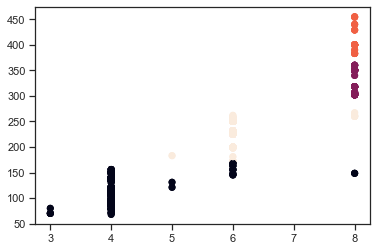

In [890]:
kmeans = KMeans(n_clusters=4).fit(df.iloc[:, 2:4])
centroids = kmeans.cluster_centers_

plt.scatter(df['Cylinders'], df['Displacement'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 2], centroids[:, 3], c='red')
plt.show()


TypeError: 'Series' objects are mutable, thus they cannot be hashed

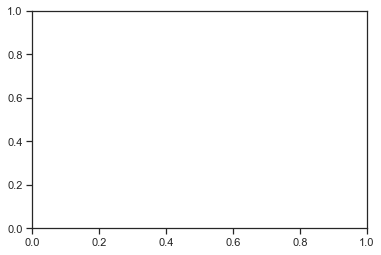

In [891]:
kmeans2 = KMeans(n_clusters=4).fit(df.iloc[:, 1:6])
centroids2 = kmeans2.cluster_centers_

plt.scatter(df['MPG'], df['Cylinders'], df['Displacement'], df['Horsepower'], df['Weight'], c1=kmeans2.labels_.astype(float))
plt.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 3],centroids[:, 4], centroids[:, 5], c1='red')
plt.show()

In [892]:
#answer

In [893]:
#2.2.2.2 Observe the above plots and compare each other. Explain how each plot is different from other in terms of cylinders representing those groups.

In [894]:
#answer/

In [895]:
#2.3 Classification

In [896]:
#2.3.1 KNN Classification of Origin

In [897]:
#2.3.1.1 Use KNN Classifier to classify ‘Origin’ with all numeric features. Print the model accuracy score and confusion matrix. 

In [898]:
#Order of Columns: Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin

XX0 = df.iloc[:,1:8].values
yy0 = df.iloc[:,8].values

# split the data into train and test sets
XX0_train, XX0_test, yy0_train, yy0_test = train_test_split(XX0, yy0, test_size=0.20)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(XX0_train, yy0_train)
pred0 = knn.predict(XX0_test)

print('Index\tPredicted\tActual')
for i in range(len(pred0)):
  if pred0[i] != yy0_test[i]:
    print(i, '\t', pred0[i], '\t\t', yy0_test[i], ' ****')

print('Accuracy Score :')    
print (accuracy_score(yy0_test, pred0))
print('Confusion Matrix :')
print(confusion_matrix(yy0_test, pred0))



Index	Predicted	Actual
11 	  US 		  Europe  ****
14 	  Japan 		  US  ****
18 	  Japan 		  Europe  ****
23 	  Japan 		  Europe  ****
29 	  Europe 		  Japan  ****
35 	  Europe 		  US  ****
38 	  Japan 		  US  ****
40 	  Europe 		  Japan  ****
42 	  US 		  Europe  ****
45 	  Japan 		  Europe  ****
50 	  US 		  Japan  ****
53 	  Japan 		  Europe  ****
56 	  Europe 		  Japan  ****
60 	  US 		  Europe  ****
67 	  Japan 		  US  ****
71 	  Japan 		  Europe  ****
76 	  US 		  Japan  ****
84 	  Europe 		  Japan  ****
87 	  US 		  Europe  ****
88 	  Japan 		  Europe  ****
89 	  Japan 		  US  ****
91 	  Japan 		  Europe  ****
92 	  Japan 		  Europe  ****
93 	  US 		  Japan  ****
94 	  US 		  Japan  ****
95 	  US 		  Japan  ****
100 	  US 		  Europe  ****
109 	  Japan 		  Europe  ****
111 	  Japan 		  Europe  ****
112 	  Japan 		  US  ****
114 	  US 		  Europe  ****
121 	  US 		  Japan  ****
127 	  US 		  Japan  ****
128 	  Europe 		  US  ****
129 	  Japan 		  US  ****
143 	  Japan 		  US  ****
150

In [899]:
#Order of Columns: Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin

XX1 = df.iloc[:, 1:8].values
yy1 = df.iloc[:,8].values

# split the data into train and test sets
XX1_train, XX1_test, yy1_train, yy1_test = train_test_split(XX1, yy1, test_size=0.20)

scaler = StandardScaler()
scaler.fit(XX1_train)

XX1_train = scaler.transform(XX1_train)
XX1_test = scaler.transform(XX1_test)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(XX1_train, yy1_train)

yy_pred1 = classifier.predict(XX1_test)
    
print ('Accuracy')
print(accuracy_score(yy1_test, yy_pred1))
print('Confusion Matrix')
print(confusion_matrix(yy1_test, yy_pred1))
print('Classification Report')
print(classification_report(yy1_test, yy_pred1))





Accuracy
0.7577639751552795
Confusion Matrix
[[19  7  9]
 [ 4 16  3]
 [ 3 13 87]]
Classification Report
              precision    recall  f1-score   support

      Europe       0.73      0.54      0.62        35
       Japan       0.44      0.70      0.54        23
          US       0.88      0.84      0.86       103

    accuracy                           0.76       161
   macro avg       0.68      0.69      0.68       161
weighted avg       0.78      0.76      0.76       161



In [900]:
#2.3.1.2  Observe the correlation matrix. Remove some features with high correlations (> around 0.9, e.g., Cylinders, weight) to Displacement and then apply KNN classifier to classify ‘Origin’ with the rest of numeric features. Print the model accuracy score and confusion matrix.

In [901]:
#select all features

In [902]:
#select few features based on correlations

In [903]:
#2.3.1.3 Compare two metrics for 2.3.1.1 and 2.3.1.2. What can you find? Please explain.

In [904]:
#answer

In [905]:
#2.3.2 KNN Classification for Cylinders

In [906]:
#Use KNN Classifier to classify ‘Cylinders’ with all numeric features. Print the model accuracy score and confusion matrix.

In [931]:
#Order of Columns: Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
dfNoCylinders = df[['MPG','Displacement','Horsepower','Weight','Acceleration','Model','Origin']]

XXX = dfNoCylinders.iloc[:,0:6].values
yyy = df.iloc[:,2].values

# split the data into train and test sets
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(XXX, yyy)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(XXX_train, yyy_train)
pred3 = knn.predict(XXX_test)

print('Index\tPredicted\tActual')
for i in range(len(pred3)):
  if pred3[i] != yyy_test[i]:
    print(i, '\t', pred3[i], '\t\t', yyy_test[i], ' *******')
    
print ('Accuracy: ', accuracy_score(yyy_test, pred3))
print('Confusion Matrix: ')
print(confusion_matrix(yyy_test, pred3))



Index	Predicted	Actual
37 	 4.0 		 3.0  *******
55 	 6.0 		 4.0  *******
63 	 4.0 		 3.0  *******
82 	 4.0 		 6.0  *******
85 	 4.0 		 3.0  *******
104 	 6.0 		 4.0  *******
107 	 4.0 		 6.0  *******
108 	 4.0 		 6.0  *******
136 	 4.0 		 3.0  *******
148 	 4.0 		 6.0  *******
153 	 8.0 		 6.0  *******
163 	 8.0 		 6.0  *******
184 	 4.0 		 6.0  *******
193 	 6.0 		 8.0  *******
Accuracy:  0.9303482587064676
Confusion Matrix: 
[[ 0  4  0  0]
 [ 0 96  2  0]
 [ 0  5 37  2]
 [ 0  0  1 54]]


In [908]:
#answer


In [909]:
#2.3.2.2 Observe the correlation matrix. Selected features with top two highest correlations with Cylinders (e.g., Displacement, Horsepower) to classify Cylinders using KNN classifier. Print the model accuracy score and confusion matrix. 

In [935]:
#Order of Columns: Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
#dfNoCylinders = df[['MPG','Displacement','Horsepower','Weight','Acceleration','Model','Origin']]

XXXX = dfNoCylinders.iloc[:,1:3].values
yyyy = df.iloc[:,2].values

# split the data into train and test sets
XXXX_train, XXXX_test, yyyy_train, yyyy_test = train_test_split(XXXX, yyyy, test_size=0.20)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(XXXX_train, yyyy_train)
pred4 = knn.predict(XXXX_test)

print('Index\tPredicted\tActual')
for i in range(len(pred4)):
  if pred4[i] != yyyy_test[i]:
    print(i, '\t', pred4[i], '\t\t', yyyy_test[i], ' *****')
    
print ('Accuracy: ', accuracy_score(yyyy_test, pred4))
print('Confusion Matrix: ')
print(confusion_matrix(yyyy_test, pred4))

Index	Predicted	Actual
64 	 4.0 		 6.0  *****
69 	 6.0 		 4.0  *****
119 	 6.0 		 5.0  *****
145 	 5.0 		 4.0  *****
Accuracy:  0.9751552795031055
Confusion Matrix: 
[[ 1  0  0  0  0]
 [ 0 81  1  1  0]
 [ 0  0  0  1  0]
 [ 0  1  0 31  0]
 [ 0  0  0  0 44]]


In [911]:
#accuracy score
print ('Accuracy: ', accuracy_score(y_test, pred))

Accuracy:  0.37267080745341613


In [912]:
#2.3.2.3 ) Selected a few features with lower correlations with Cylinders (e.g., Acceleration, Model) to classify Cylinders using KNN classifier. Print the model accuracy score and confusion matrix.

In [936]:
XXXXX = dfNoCylinders.iloc[:,4:6].values
yyyyy = df.iloc[:,2].values

# split the data into train and test sets
XXXXX_train, XXXXX_test, yyyyy_train, yyyyy_test = train_test_split(XXXXX, yyyyy)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(XXXXX_train, yyyyy_train)
pred5 = knn.predict(XXXXX_test)

print('Index\tPredicted\tActual')
for i in range(len(pred5)):
  if pred5[i] != yyyyy_test[i]:
    print(i, '\t', pred5[i], '\t\t', yyyyy_test[i], ' ***')
    
print ('Accuracy: ', accuracy_score(yyyyy_test, pred5))
print('Confusion Matrix: ')
print(confusion_matrix(yyyyy_test, pred5))

Index	Predicted	Actual
2 	 4.0 		 6.0  ***
6 	 6.0 		 4.0  ***
8 	 4.0 		 6.0  ***
10 	 4.0 		 8.0  ***
13 	 8.0 		 4.0  ***
15 	 6.0 		 4.0  ***
21 	 4.0 		 6.0  ***
24 	 6.0 		 4.0  ***
31 	 6.0 		 4.0  ***
32 	 6.0 		 4.0  ***
33 	 4.0 		 8.0  ***
34 	 4.0 		 6.0  ***
36 	 6.0 		 4.0  ***
37 	 4.0 		 6.0  ***
40 	 4.0 		 8.0  ***
41 	 6.0 		 4.0  ***
43 	 4.0 		 8.0  ***
48 	 4.0 		 6.0  ***
54 	 6.0 		 4.0  ***
60 	 4.0 		 6.0  ***
61 	 4.0 		 8.0  ***
65 	 4.0 		 6.0  ***
66 	 4.0 		 8.0  ***
67 	 4.0 		 3.0  ***
68 	 4.0 		 6.0  ***
69 	 6.0 		 8.0  ***
71 	 8.0 		 4.0  ***
74 	 4.0 		 6.0  ***
76 	 3.0 		 6.0  ***
80 	 8.0 		 6.0  ***
82 	 6.0 		 4.0  ***
87 	 4.0 		 6.0  ***
89 	 8.0 		 6.0  ***
90 	 4.0 		 5.0  ***
91 	 4.0 		 8.0  ***
94 	 4.0 		 6.0  ***
96 	 4.0 		 6.0  ***
106 	 5.0 		 4.0  ***
111 	 6.0 		 4.0  ***
112 	 4.0 		 6.0  ***
113 	 8.0 		 4.0  ***
115 	 4.0 		 8.0  ***
123 	 6.0 		 4.0  ***
124 	 4.0 		 8.0  ***
125 	 4.0 		 8.0  ***
126 	 4.0 		 8.0  ***
127 	

In [915]:
#2.3.2.4Compare two metrics for 2.3.2.1, 2.3.2.2, and 2.3.2.3. What can you find? Please explain.

In [916]:
#answqer

In [917]:
#2.3.3 Compare with 2.3.1 and 2.3.2. What can you find? Please clearly explain in the notebook.

In [918]:
#answer